In [25]:
# loading all the libraries needed
from pandas import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
# load data
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

In [73]:
data.describe()

,Unnamed: 0,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.


Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive

In [77]:
# get the summary of Age
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

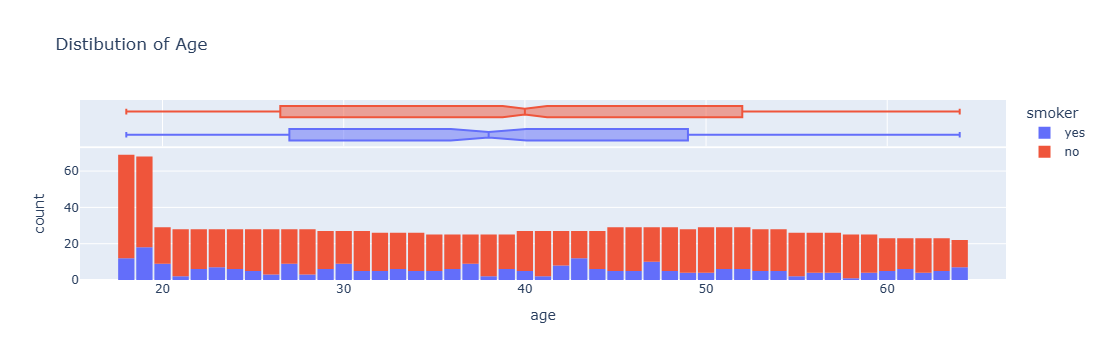

In [67]:
# perform EDA using Histograms, Scatter plot, Box plot, Heat map
# checking the distribution of Age
fig = px.histogram(data,
   x = 'age',
   color = 'smoker',
   marginal = 'box',
   nbins = 47,
   title = 'Distibution of Age')       
fig.update_layout(bargap = 0.1)            
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

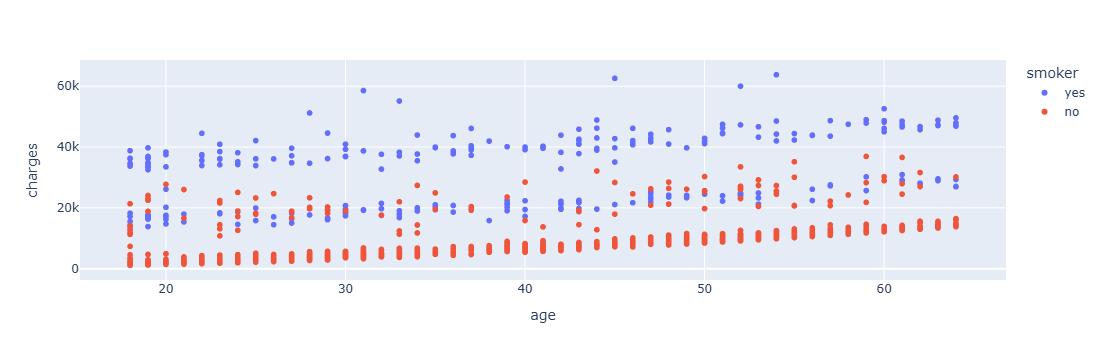

In [65]:
# Check linearity with the target variable with scatter plot
fig = px.scatter(data,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker')
fig.show()

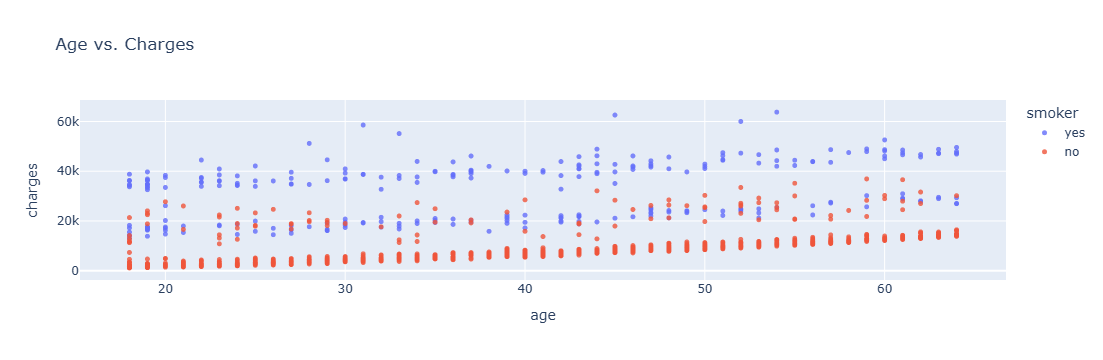

In [140]:
# we can also add another variable by hover_data
fig = px.scatter(data, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

In [80]:
# let us get the summary of bmi
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

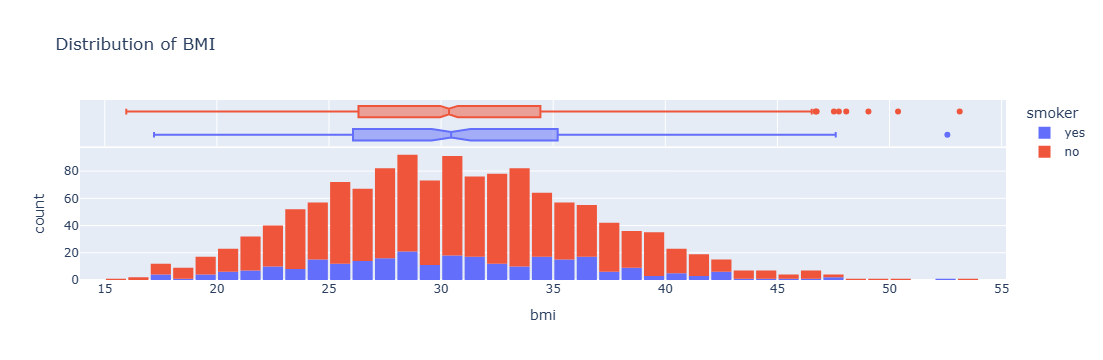

In [96]:
# Let us look at the distribution of bmi

fig = px.histogram(data,
                   x = 'bmi',
                   color = 'smoker',                   
                   nbins = 39,
                   marginal = 'box',
                   title = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()
                   

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

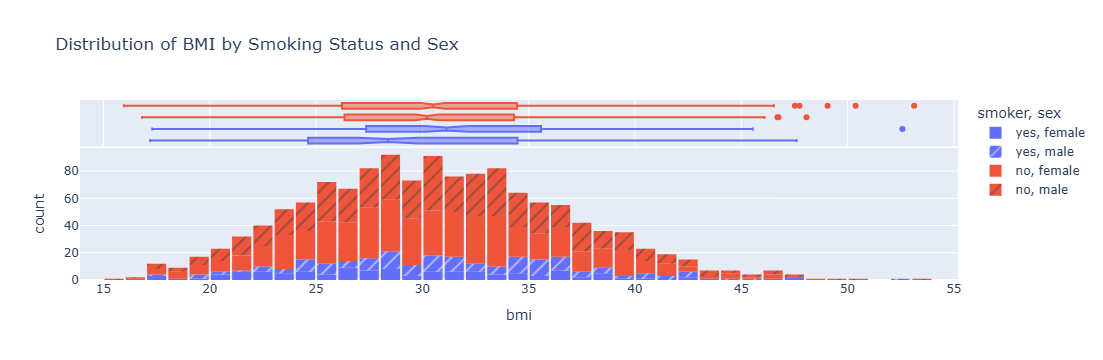

In [114]:
# We can also use shape to add other catagorical variable in this case like sex

fig = px.histogram(data,  
                    x='bmi',  
                    color='smoker',  
                    pattern_shape='sex',  # Add pattern based on sex  
                    nbins=39,  
                    marginal='box',  
                    title='Distribution of BMI by Smoking Status and Sex')  
fig.update_layout(bargap=0.1)  
fig.show()  

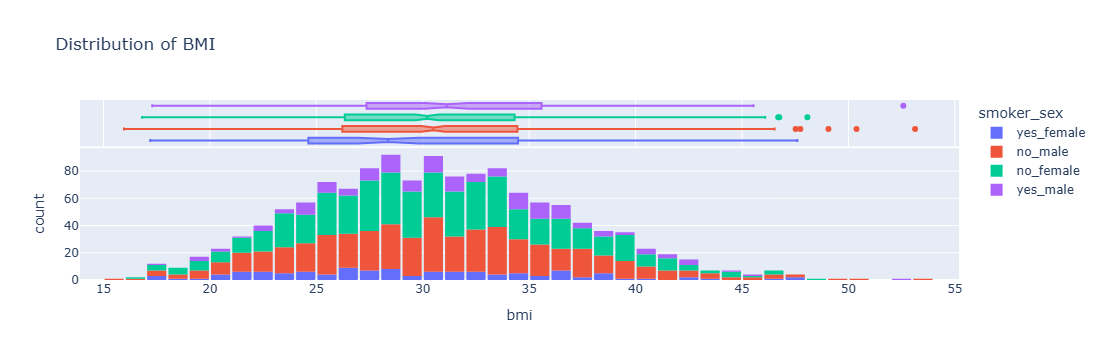

In [100]:
# now let us add sex as well

# Create a new combined categorical variable  
data['smoker_sex'] = data['smoker'] + '_' + data['sex']

fig = px.histogram(data,
                   x = 'bmi',
                   color = 'smoker_sex',                   
                   nbins = 39,
                   marginal = 'box',
                   title = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

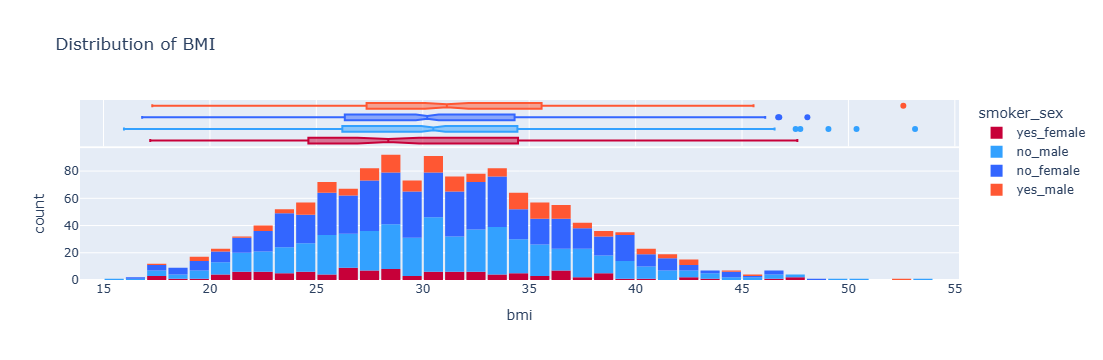

In [106]:
# Let us pick our# Create a new combined categorical variable  
data['smoker_sex'] = data['smoker'] + '_' + data['sex']

fig = px.histogram(data,
                   x = 'bmi',
                   color = 'smoker_sex',                   
                   nbins = 39,
                   marginal = 'box',
                   title = 'Distribution of BMI',
                   color_discrete_map={  
                        'yes_male': '#FF5733',  
                        'yes_female': '#C70039',  
                        'no_male': '#33A1FF',  
                        'no_female': '#3366FF'  
                    }
                  )
fig.update_layout(bargap = 0.1)
fig.show() 



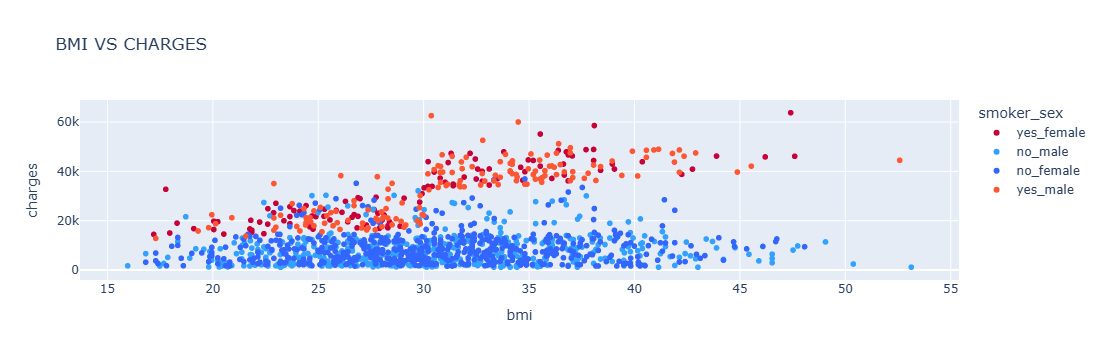

In [110]:
# Let us check bmi's relationship with charges
data['smoker_sex'] = data['smoker'] + '_' + data['sex']
fig = px.scatter(data,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker_sex',
                 title = 'BMI VS CHARGES',
                 color_discrete_map={  
                        'yes_male': '#FF5733',  
                        'yes_female': '#C70039',  
                        'no_male': '#33A1FF',  
                        'no_female': '#3366FF'  
                    }                 
    
)
fig.show()

# Let us check the distribution of the target variable since 
1. Categorical variables do not have distributions in the continuous sense.
2. Scaling does not make categorical variables continuous, so checking distribution is still not valid.
3. Instead, analyze frequency distributions for categorical data (bar charts, proportions).
4. For numerical data, checking distributions can be important for modeling decisions

In [118]:
# first let us get the summary of charges

data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

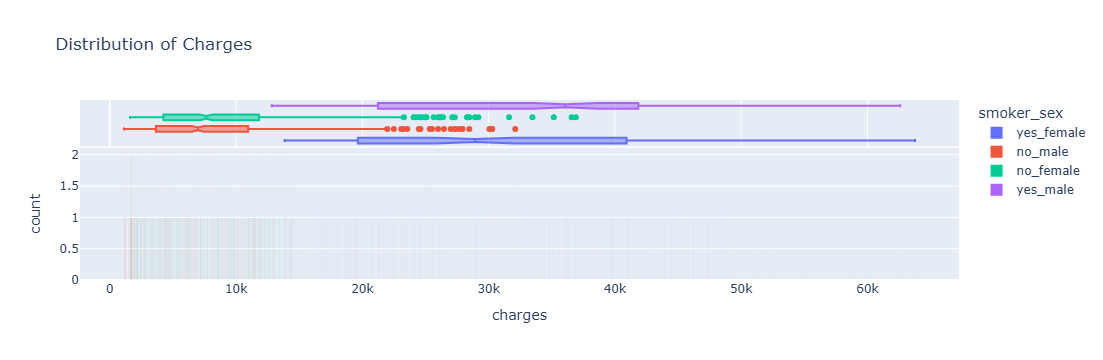

In [130]:
# let us check the distribution on charges

fig = px.histogram(data,
                   x = 'charges',
                   color = 'smoker_sex',
                   nbins = 63771,
                   marginal = 'box',
                   title = 'Distribution of Charges') 
fig.update_layout(bargap = 0.1)
fig.show()
    


For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is\
730edianforsmokersiscloseto
35,000.

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [136]:
# let us get the count of smokers by yes no. we are doing the frequency here

data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

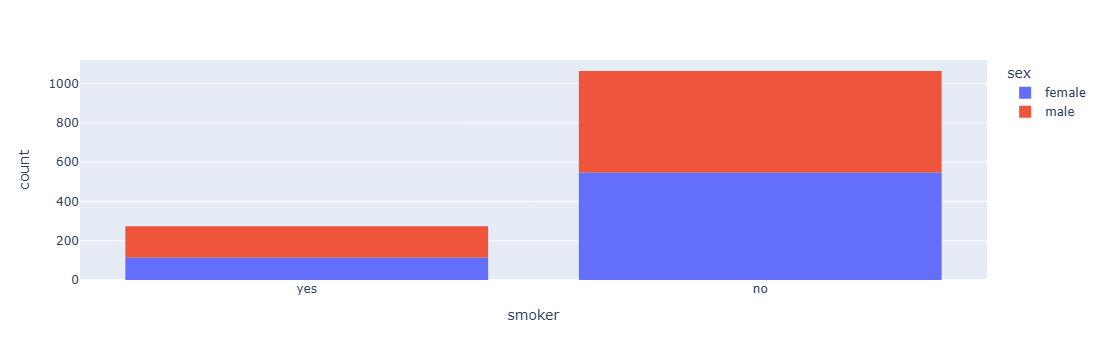

In [138]:
# Now let us get the histogram on smoker

fig = px.histogram(data,
                   x = 'smoker',
                   color = 'sex')
    
fig.show()

In [149]:
 import pandas as pd  
 import numpy as np  
 from scipy import stats  
 import statsmodels.api as sm  
 from statsmodels.stats.outliers_influence import variance_inflation_factor  
 from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt  
 from sklearn.feature_selection import mutual_info_regression  
   
 # Load data  
 data = pd.read_csv('data.csv')  
 print("Data loaded with shape:", data.shape)  
   
 # Create a numeric-only DataFrame for analyses that require numeric types  
 data_numeric = data.select_dtypes(include=[np.number])  
 print("Using numeric data shape:", data_numeric.shape)  
   
 # 1. Correlation (only on numeric data)  
 correlation_matrix = data_numeric.corr()  
 print("\nCorrelation Matrix:")  
 print(correlation_matrix)  
   
 # 2. Variance Inflation Factor (VIF)  
 # Assume target variable is 'medv' if present. Otherwise use all numeric columns.  
 if 'medv' in data_numeric.columns:  
     X_for_vif = data_numeric.drop(columns=['medv'])  
 else:  
     X_for_vif = data_numeric.copy()  
   
 X_const = sm.add_constant(X_for_vif)  
 vif_df = pd.DataFrame()  
 vif_df['feature'] = X_for_vif.columns  
 vif_df['VIF'] = [variance_inflation_factor(X_const.values, i+1) for i in range(X_for_vif.shape[1])] # i+1 skips constant  
 print("\nVariance Inflation Factor (VIF):")  
 print(vif_df)  
   
 # 3. Data Skewness  
 data_skew = data_numeric.skew()  
 print("\nSkewness on numeric features:")  
 print(data_skew)  
   
 # 4. Outliers Detection using Z-score method  
 def detect_outliers_zscore(df, threshold=3):  
     z_scores = np.abs(stats.zscore(df, nan_policy='omit'))  
     outlier_mask = (z_scores > threshold).any(axis=1)  
     return outlier_mask  
   
 zscore_mask = detect_outliers_zscore(data_numeric, threshold=3)  
 print("\nNumber of outlier rows detected using Z-score method:", zscore_mask.sum())  
   
 # 5. Outliers Detection using IQR method  
 def detect_outliers_iqr(df):  
     Q1 = df.quantile(0.25)  
     Q3 = df.quantile(0.75)  
     IQR = Q3 - Q1  
     # Identify rows that are outliers in any column  
     outlier_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)  
     return outlier_mask  
   
 iqr_mask = detect_outliers_iqr(data_numeric)  
 print("Number of outlier rows detected using IQR method:", iqr_mask.sum())  
   
 # 6. Outliers Detection using Modified Z-score method  
 def detect_outliers_modified_zscore(df, threshold=3.5):  
     median = df.median()  
     mad = np.median(np.abs(df - median))  
     # Prevent division by zero if mad is 0 for any column  
     if mad == 0:  
         mad = 1e-9  
     modified_z_scores = 0.6745 * (df - median) / mad  
     modified_z_scores = np.abs(modified_z_scores)  
     outlier_mask = (modified_z_scores > threshold).any(axis=1)  
     return outlier_mask  
   
 modified_zscore_mask = detect_outliers_modified_zscore(data_numeric, threshold=3.5)  
 print("Number of outlier rows detected using Modified Z-score method:", modified_zscore_mask.sum())  
   
 # 7. Non-Linearity Detection: Spearman’s Rank Correlation  
 # Select two variables. If 'medv' and 'bmi' are present in numeric columns, use them.  
 numeric_columns = list(data_numeric.columns)  
 if 'medv' in numeric_columns and 'bmi' in numeric_columns:  
     x = data_numeric['bmi']  
     y = data_numeric['medv']  
 elif len(numeric_columns) >= 2:  
     x = data_numeric[numeric_columns[0]]  
     y = data_numeric[numeric_columns[1]]  
 else:  
     x = data_numeric.iloc[:, 0]  
     y = data_numeric.iloc[:, 0]  
       
 spearman_corr, spearman_p = stats.spearmanr(x, y, nan_policy='omit')  
 print("\nSpearman’s Rank Correlation between selected variables:")  
 print("Correlation:", spearman_corr, "P-value:", spearman_p)  
   
 # 8. Mutual Information Score between the same two variables (requires x to be 2D)  
 if not x.isnull().all() and not y.isnull().all():  
     mi = mutual_info_regression(x.to_frame(), y)  
     print("\nMutual Information Score between selected variables:")  
     print(mi[0])  
 else:  
     print("\nMutual Information Score could not be computed due to missing values.")  
   
 # 9. Heteroscedasticity Detection: Breusch-Pagan Test  
 # For this, we need to define target and predictors.  
 if 'medv' in data_numeric.columns:  
     target = data_numeric['medv']  
     predictors = data_numeric.drop(columns=['medv'])  
 else:  
     # If no designated target, use the first numeric column as target.  
     target = data_numeric.iloc[:, 0]  
     predictors = data_numeric.iloc[:, 1:]  # if available  
   
 # Add constant:  
 predictors_const = sm.add_constant(predictors)  
 model = sm.OLS(target, predictors_const, missing='drop').fit()  
 residuals = model.resid  
 bp_test = het_breuschpagan(residuals, predictors_const)  
 print("\nBreusch-Pagan Test:")  
 print("LM Statistic:", bp_test[0], "LM P-value:", bp_test[1])  
 print("F-Statistic:", bp_test[2], "F P-value:", bp_test[3])  
   
 # 10. White's Test for heteroscedasticity  
 white_test = het_white(residuals, predictors_const)  
 print("\nWhite's Test:")  
 print("Test Statistic:", white_test[0], "P-value:", white_test[1])  
   
 # 11. Goldfeld-Quandt Test for heteroscedasticity  
 gq_test = het_goldfeldquandt(residuals, predictors_const)  
 print("\nGoldfeld-Quandt Test:")  
 print("F-Statistic:", gq_test[0], "P-value:", gq_test[1])  
   
 #####################  
 # SUMMARY & SUGGESTIONS  
 #####################  
 print("\nSummary and suggestions based on the analyses:")  
 print("- For correlation and VIF, use numeric predictors only. Variables with high VIF (> 5 or 10) should be further evaluated for multicollinearity.")  
 print("- Skewness values help you understand the distribution shapes. High skewness might indicate the need for variable transformations (e.g., log, Box-Cox).")  
 print("- Outlier detection methods (Z-score, IQR, Modified Z-score) help identify potentially problematic data points. Consider investigating or capping/removing those outliers if they unduly influence your models.")  
 print("- The Spearman correlation and mutual information scores provide insights into non-linear relationships. Check scatter plots if needed for more details.")  
 print("- The heteroscedasticity tests (Breusch-Pagan, White's, and Goldfeld-Quandt) help evaluate if the error variance is constant. If heteroscedasticity is present, consider using robust standard errors or variable transformations.")  

Data loaded with shape: (1338, 8)
Using numeric data shape: (1338, 5)

Correlation Matrix:
            Unnamed: 0       age       bmi  children   charges
Unnamed: 0    1.000000 -0.031467 -0.036169  0.025221 -0.003373
age          -0.031467  1.000000  0.109272  0.042469  0.299008
bmi          -0.036169  0.109272  1.000000  0.012759  0.198341
children      0.025221  0.042469  0.012759  1.000000  0.067998
charges      -0.003373  0.299008  0.198341  0.067998  1.000000

Variance Inflation Factor (VIF):
      feature       VIF
0  Unnamed: 0  1.002919
1         age  1.102964
2         bmi  1.045181
3    children  1.005884
4     charges  1.136622

Skewness on numeric features:
Unnamed: 0    0.000000
age           0.055673
bmi           0.284047
children      0.938380
charges       1.515880
dtype: float64

Number of outlier rows detected using Z-score method: 29
Number of outlier rows detected using IQR method: 145
Number of outlier rows detected using Modified Z-score method: 1336

Spearman’s 

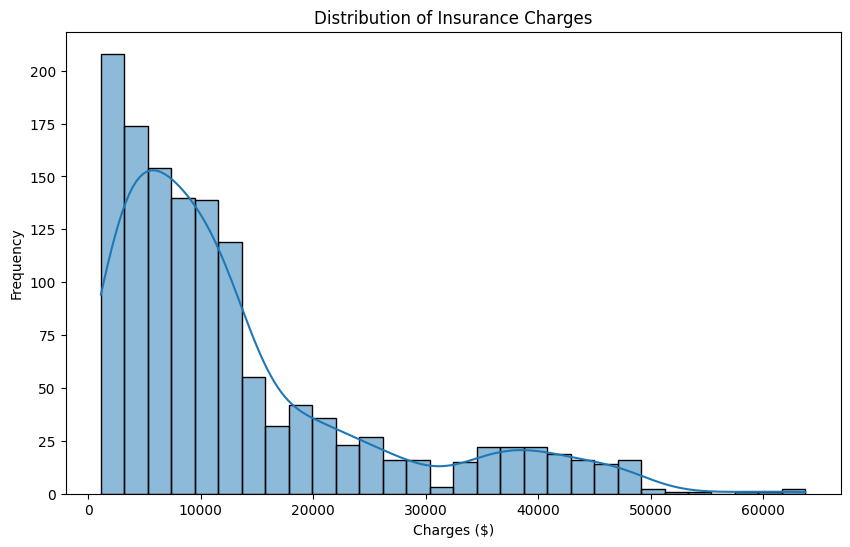

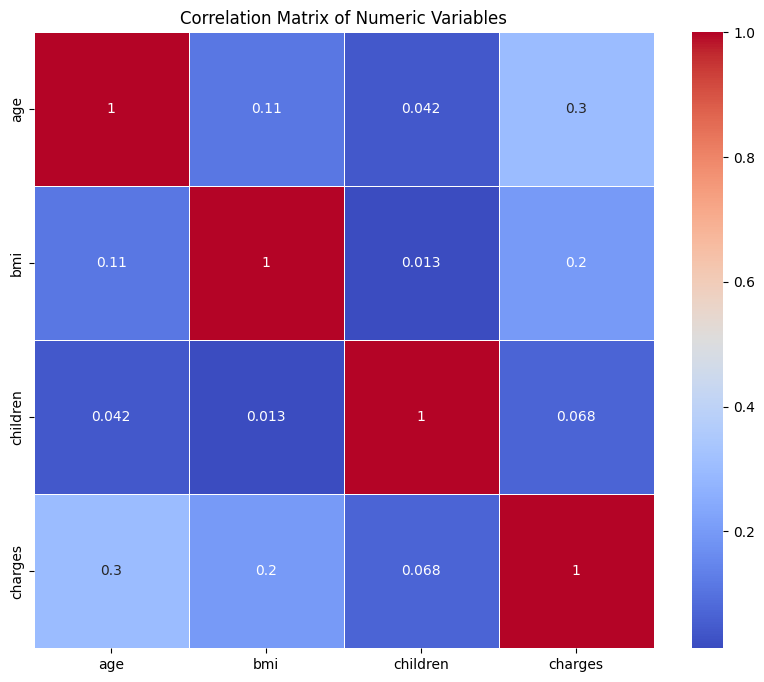

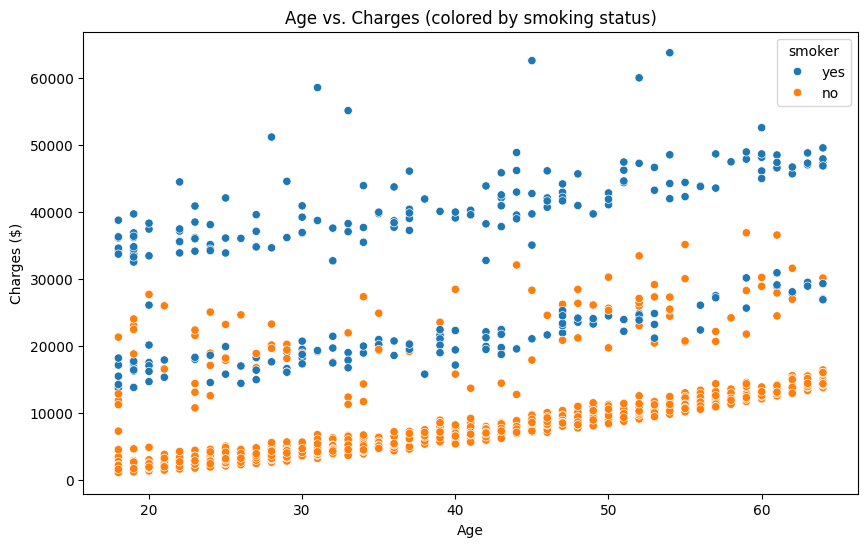

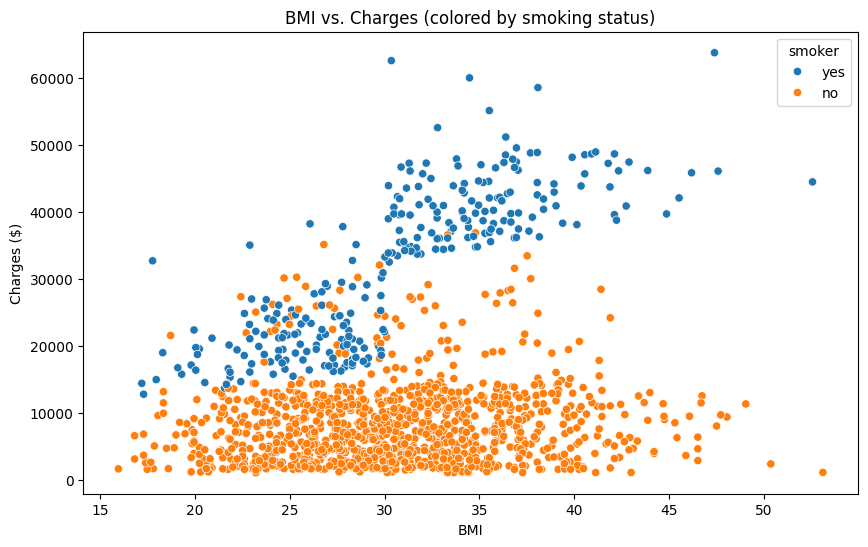

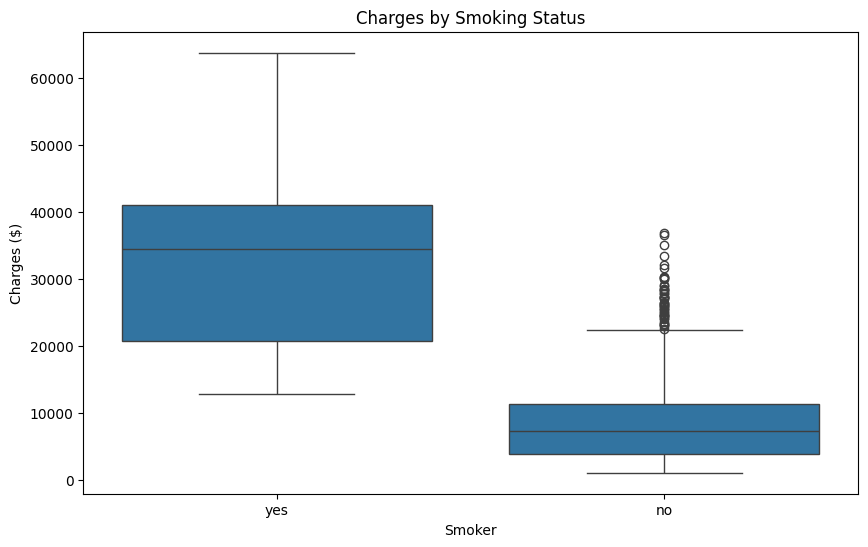

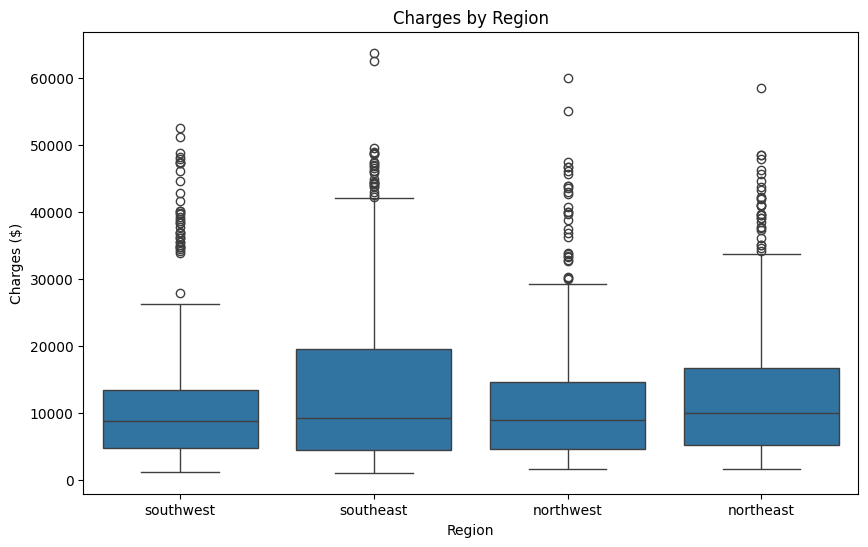

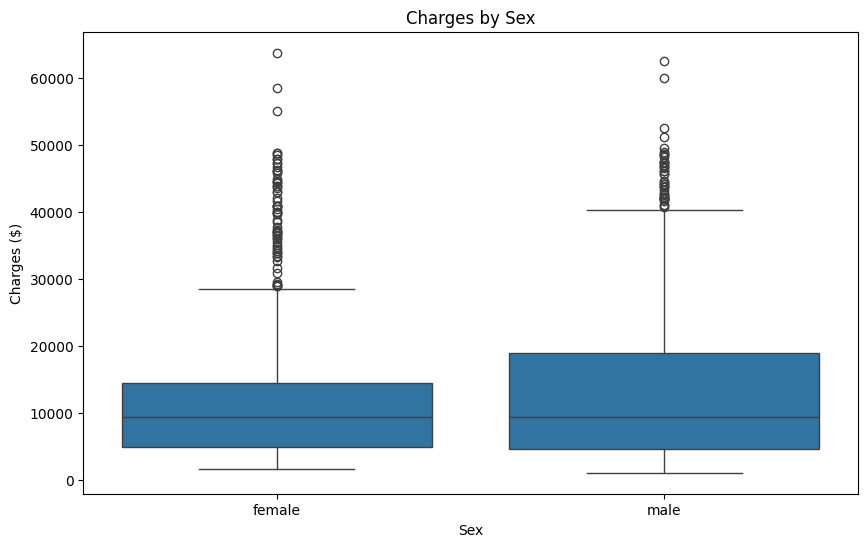

Visualization completed.


In [151]:
# Let's visualize the relationships between variables and charges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
data = pd.read_csv('data.csv')

# Drop the unnamed index column if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

# Visualize the distribution of the target variable (charges)
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.show()

# Create a correlation heatmap for numeric variables
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Visualize the relationship between age and charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title('Age vs. Charges (colored by smoking status)')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

# Visualize the relationship between BMI and charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title('BMI vs. Charges (colored by smoking status)')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.show()

# Box plot of charges by smoking status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges ($)')
plt.show()

# Box plot of charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges ($)')
plt.show()

# Box plot of charges by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges ($)')
plt.show()

print("Visualization completed.")

The distribution of charges is right-skewed, suggesting that most people have lower charges while a few have very high charges.
The correlation matrix shows that smoking status and age have the strongest correlations with charges.
There's a clear separation between smokers and non-smokers in terms of charges, with smokers generally having higher charges across all age groups.
BMI shows a similar pattern - smokers with higher BMI tend to have significantly higher charges.
The boxplot confirms that smokers have substantially higher charges than non-smokers.
Region doesn't seem to have a strong effect on charges, though there are some minor differences.
Sex doesn't appear to have a major impact on charges.


Linear Regression Results:
Training RMSE: $4893.78
Testing RMSE: $4574.12
Training R²: 0.8341
Testing R²: 0.8652
Training MAE: $2974.96
Testing MAE: $2757.76
Ridge Regression Results:
Training RMSE: $4895.33
Testing RMSE: $4566.47
Training R²: 0.8340
Testing R²: 0.8657
Training MAE: $2975.61
Testing MAE: $2768.59
Lasso Regression Results:
Training RMSE: $4893.78
Testing RMSE: $4574.05
Training R²: 0.8341
Testing R²: 0.8652
Training MAE: $2974.95
Testing MAE: $2757.83
Random Forest Results:
Training RMSE: $1939.39
Testing RMSE: $4561.11
Training R²: 0.9739
Testing R²: 0.8660
Training MAE: $1070.09
Testing MAE: $2545.93
Gradient Boosting Results:
Training RMSE: $3776.19
Testing RMSE: $4367.82
Training R²: 0.9012
Testing R²: 0.8771
Training MAE: $2074.18
Testing MAE: $2479.40


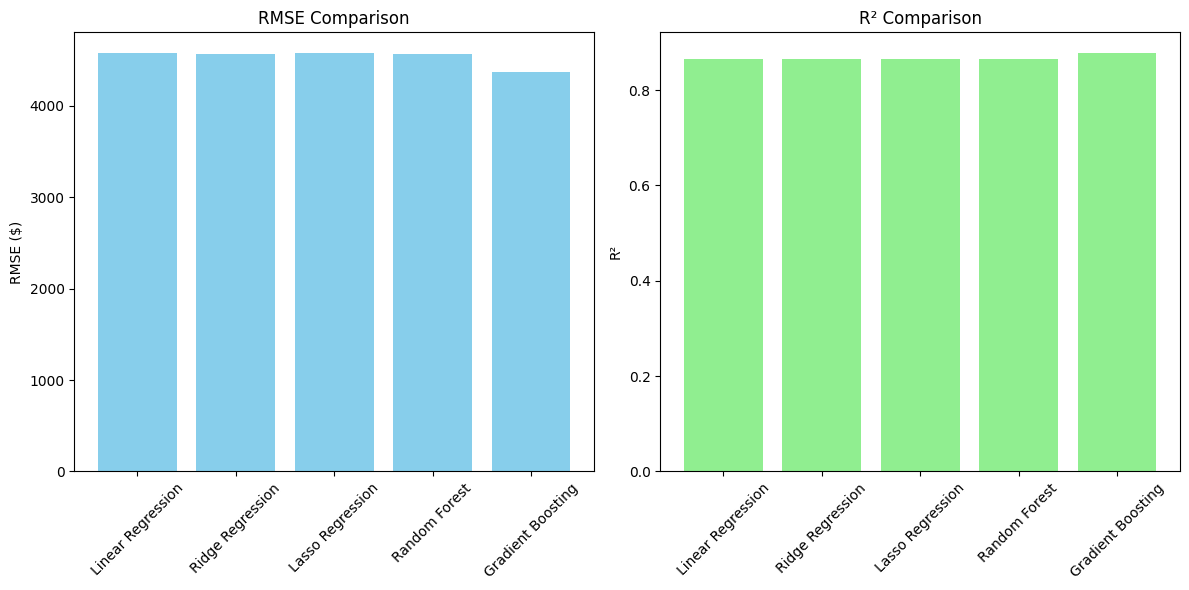

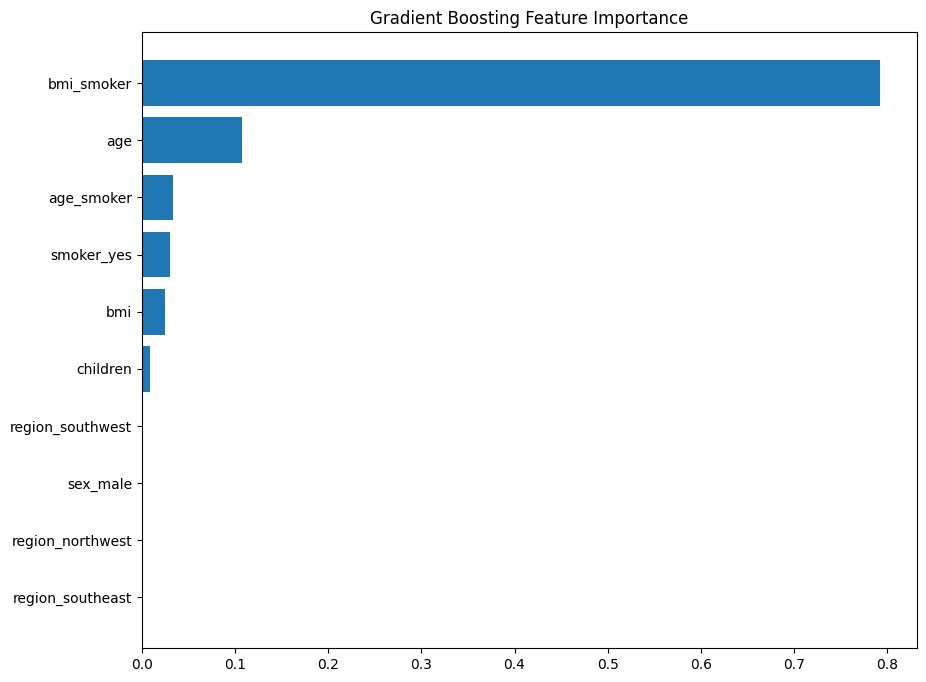

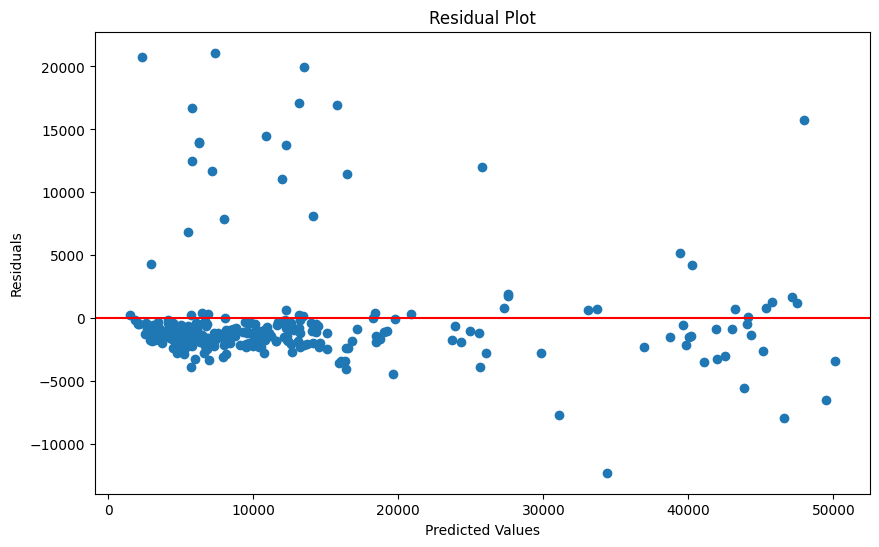

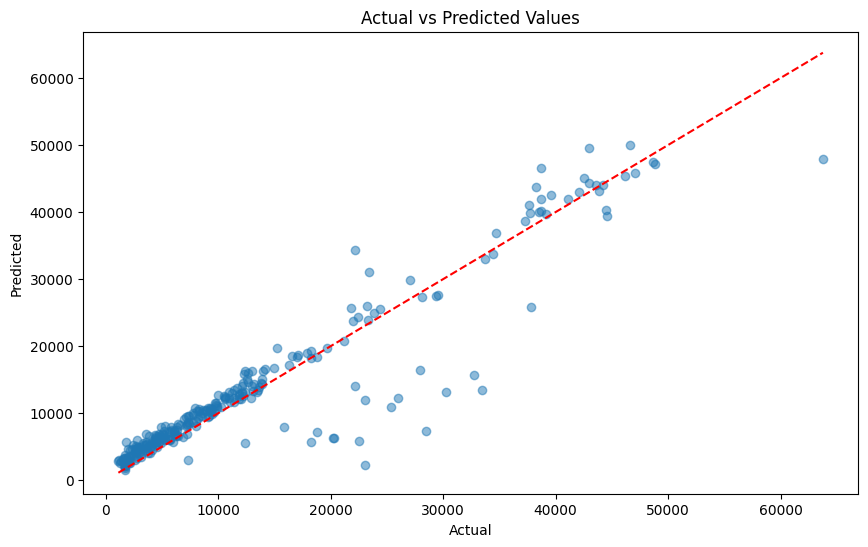

Model evaluation completed.


In [158]:
# Now let's build and evaluate our models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('data.csv')

# Drop the unnamed index column if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

# Create interaction terms
data['bmi_smoker'] = data['bmi'] * (data['smoker'] == 'yes').astype(int)
data['age_smoker'] = data['age'] * (data['smoker'] == 'yes').astype(int)

# One-hot encode categorical variables
categorical_cols = ['sex', 'smoker', 'region']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features and target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Print results
    print(f"\
{model_name} Results:")
    print(f"Training RMSE: ${train_rmse:.2f}")
    print(f"Testing RMSE: ${test_rmse:.2f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")
    print(f"Training MAE: ${train_mae:.2f}")
    print(f"Testing MAE: ${test_mae:.2f}")
    
    return model, test_rmse, test_r2

# 1. Linear Regression
lr_model = LinearRegression()
lr_model, lr_rmse, lr_r2 = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model, ridge_rmse, ridge_r2 = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression")

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model, lasso_rmse, lasso_r2 = evaluate_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression")

# 4. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model, rf_rmse, rf_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 5. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model, gb_rmse, gb_r2 = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")

# Compare models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting']
rmse_scores = [lr_rmse, ridge_rmse, lasso_rmse, rf_rmse, gb_rmse]
r2_scores = [lr_r2, ridge_r2, lasso_r2, rf_r2, gb_r2]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_scores, color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE ($)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='lightgreen')
plt.title('R² Comparison')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Let's look at feature importance for the best performing model (Gradient Boosting)
if gb_r2 > rf_r2 and gb_r2 > lr_r2 and gb_r2 > ridge_r2 and gb_r2 > lasso_r2:
    feature_importance = gb_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
    plt.title('Gradient Boosting Feature Importance')
    plt.show()
elif rf_r2 > gb_r2 and rf_r2 > lr_r2 and rf_r2 > ridge_r2 and rf_r2 > lasso_r2:
    feature_importance = rf_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
    plt.title('Random Forest Feature Importance')
    plt.show()

# Let's also look at the residuals of the best model
best_model = gb_model if gb_r2 > rf_r2 else rf_model
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print("\
Model evaluation completed.")

In [160]:
# Create a complete pipeline for insurance charges prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('data.csv')

# Drop the unnamed index column if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Check data types
print("\
Data types:")
print(data.dtypes)

# Split the data into features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\
Creating pipeline...")

# Define numeric and categorical features
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline with the gradient boosting regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print("\
Pipeline Results:")
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Testing RMSE: ${test_rmse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training MAE: ${train_mae:.2f}")
print(f"Testing MAE: ${test_mae:.2f}")

# Save the pipeline
print("\
Saving pipeline to 'insurance_charges_pipeline.joblib'...")
joblib.dump(pipeline, 'insurance_charges_pipeline.joblib')
print("Pipeline saved successfully!")

Dataset preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Creating pipeline...
Pipeline Results:
Training RMSE: $3806.38
Testing RMSE: $4329.57
Training R²: 0.8996
Testing R²: 0.8793
Training MAE: $2096.58
Testing MAE: $2443.48
Saving pipeline to 'insurance_charges_pipeline.joblib'...
Pipeline saved successfully!


In [162]:
# Reload the pipeline and create a one-call prediction function
import pandas as pd
import numpy as np
import joblib

# Load the saved pipeline
print("Loading the pipeline from 'insurance_charges_pipeline.joblib'...")
loaded_pipeline = joblib.load('insurance_charges_pipeline.joblib')
print("Pipeline loaded successfully!")

# Define a one-call prediction function
def predict_insurance_charges(age, sex, bmi, children, smoker, region):
    """
    Predict insurance charges based on input features.
    
    Parameters:
    -----------
    age : int
        Age of the person
    sex : str
        Gender of the person ('male' or 'female')
    bmi : float
        Body Mass Index
    children : int
        Number of children/dependents
    smoker : str
        Smoking status ('yes' or 'no')
    region : str
        Geographic region ('northeast', 'northwest', 'southeast', 'southwest')
        
    Returns:
    --------
    float
        Predicted insurance charges
    """
    # Create a DataFrame with the input features
    data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })
    
    # Make prediction using the loaded pipeline
    prediction = loaded_pipeline.predict(data)[0]
    
    return prediction

# Test the function with a new sample entry
# Example 1: A 30-year-old male with BMI 25, no children, non-smoker from northeast
example1 = {
    'age': 30,
    'sex': 'male',
    'bmi': 25.0,
    'children': 0,
    'smoker': 'no',
    'region': 'northeast'
}

# Example 2: A 45-year-old female with BMI 30, 2 children, smoker from southwest
example2 = {
    'age': 45,
    'sex': 'female',
    'bmi': 30.0,
    'children': 2,
    'smoker': 'yes',
    'region': 'southwest'
}

# Make predictions
prediction1 = predict_insurance_charges(**example1)
prediction2 = predict_insurance_charges(**example2)

print("\
Prediction Results:")
print(f"Example 1 (30-year-old male, BMI 25, no children, non-smoker, northeast):")
print(f"Predicted Insurance Charges: ${prediction1:.2f}")

print(f"\
Example 2 (45-year-old female, BMI 30, 2 children, smoker, southwest):")
print(f"Predicted Insurance Charges: ${prediction2:.2f}")

# Let's also create a function that can handle multiple predictions at once
def batch_predict_insurance_charges(data_list):
    """
    Predict insurance charges for multiple individuals.
    
    Parameters:
    -----------
    data_list : list of dict
        List of dictionaries containing features for each individual
        
    Returns:
    --------
    list
        List of predicted insurance charges
    """
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data_list)
    
    # Make predictions
    predictions = loaded_pipeline.predict(df)
    
    return predictions

# Test batch prediction with both examples
batch_data = [example1, example2]
batch_predictions = batch_predict_insurance_charges(batch_data)

print("\
Batch Prediction Results:")
for i, (data, prediction) in enumerate(zip(batch_data, batch_predictions)):
    print(f"Example {i+1}: ${prediction:.2f}")

# Save the prediction functions to a module
with open('insurance_predictor.py', 'w') as f:
    f.write("""import pandas as pd
import joblib

# Load the pipeline
pipeline = joblib.load('insurance_charges_pipeline.joblib')

def predict_insurance_charges(age, sex, bmi, children, smoker, region):
    \"\"\"
    Predict insurance charges based on input features.
    
    Parameters:
    -----------
    age : int
        Age of the person
    sex : str
        Gender of the person ('male' or 'female')
    bmi : float
        Body Mass Index
    children : int
        Number of children/dependents
    smoker : str
        Smoking status ('yes' or 'no')
    region : str
        Geographic region ('northeast', 'northwest', 'southeast', 'southwest')
        
    Returns:
    --------
    float
        Predicted insurance charges
    \"\"\"
    # Create a DataFrame with the input features
    data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })
    
    # Make prediction using the loaded pipeline
    prediction = pipeline.predict(data)[0]
    
    return prediction

def batch_predict_insurance_charges(data_list):
    \"\"\"
    Predict insurance charges for multiple individuals.
    
    Parameters:
    -----------
    data_list : list of dict
        List of dictionaries containing features for each individual
        
    Returns:
    --------
    list
        List of predicted insurance charges
    \"\"\"
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data_list)
    
    # Make predictions
    predictions = pipeline.predict(df)
    
    return predictions
""")

print("\
Prediction functions saved to 'insurance_predictor.py'")
print("You can now import and use these functions in other scripts with:")
print("from insurance_predictor import predict_insurance_charges, batch_predict_insurance_charges")

Loading the pipeline from 'insurance_charges_pipeline.joblib'...
Pipeline loaded successfully!
Prediction Results:
Example 1 (30-year-old male, BMI 25, no children, non-smoker, northeast):
Predicted Insurance Charges: $5005.82
Example 2 (45-year-old female, BMI 30, 2 children, smoker, southwest):
Predicted Insurance Charges: $37875.96
Batch Prediction Results:
Example 1: $5005.82
Example 2: $37875.96
Prediction functions saved to 'insurance_predictor.py'
You can now import and use these functions in other scripts with:
from insurance_predictor import predict_insurance_charges, batch_predict_insurance_charges
